# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

In [1]:
!wget https://nlp100.github.io/data/neko.txt

--2020-05-25 12:48:48--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.109.153, 185.199.108.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965825 (943K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 943.19K  --.-KB/s    in 0.1s    

2020-05-25 12:48:48 (7.51 MB/s) - ‘neko.txt’ saved [965825/965825]



In [2]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 31 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd6

In [0]:
!mecab -o ./neko.txt.mecab ./neko.txt

## 30. 形態素解析結果の読み込み
***
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
filename = './neko.txt.mecab'

# 文単位に分割して読込
with open(filename, mode='r', encoding='utf-8') as f:
  text = f.read().split('EOS\n')

# 空白文の削除
text = list(filter(lambda x: x != '', text))

# 確認
for i in range(3):
  print(text[i])

# 指定フォーマットに整形
result = []
for sentence in text:
  result_sentence = []
  for line in sentence.split('\n'):
    if line == '':
      continue
    else:
      (surface, attr) = line.split('\t')
      attr = attr.split(',')
      d = {'surface': surface, 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
      result_sentence.append(d)
  result.append(result_sentence)

# 確認
for i in range(3):
  print(result[i])

一	名詞,数,*,*,*,*,一,イチ,イチ

　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。

名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1'

## 31. 動詞
***
動詞の表層形をすべて抽出せよ．

In [5]:
ans = []
for sentence in result:
  extraction = list(filter(lambda x: x['pos'] == '動詞', sentence))
  extraction = [e['surface'] for e in extraction]
  ans.append(extraction)

# 確認
for i in range(5):
  print(list(filter(lambda x: x != [], ans))[i])

['生れ', 'つか']
['し', '泣い', 'し', 'いる']
['始め', '見']
['聞く']
['捕え', '煮', '食う']


## 32. 動詞の原形
***
動詞の原形をすべて抽出せよ．

In [6]:
ans = []
for sentence in result:
  extraction = list(filter(lambda x: x['pos'] == '動詞', sentence))
  extraction = [e['base'] for e in extraction]
  ans.append(extraction)

# 確認
for i in range(5):
  print(list(filter(lambda x: x != [], ans))[i])

['生れる', 'つく']
['する', '泣く', 'する', 'いる']
['始める', '見る']
['聞く']
['捕える', '煮る', '食う']


## 33. 「AのB」
***
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [7]:
ans = []
for sentence in result:
  extraction = []
  for i in range(1, len(sentence) - 1):
    if sentence[i - 1]['pos'] == '名詞' and sentence[i]['surface'] == 'の' and sentence[i + 1]['pos'] == '名詞':
      extraction.append(sentence[i - 1]['surface'] + sentence[i]['surface'] + sentence[i + 1]['surface'])
  ans.append(extraction)

# 確認
for i in range(5):
  print(list(filter(lambda x: x != [], ans))[i])

['彼の掌']
['掌の上', '書生の顔']
['はずの顔']
['顔の真中']
['穴の中']


## 34. 名詞の連接
***
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [8]:
ans = []
for sentence in result:
  extraction = []
  nouns = ''
  num = 0
  for i in range(len(sentence)):
    if sentence[i]['pos'] == '名詞':  # 最初の形態素から順に、名詞であればnounsに連結し、連結数(num)をカウント
      nouns = nouns + sentence[i]['surface']
      num += 1
    elif num >= 2:  # 名詞以外の場合、ここまでの連結数が2以上であれば出力し、nounsとnumを初期化
      extraction.append(nouns)
      nouns = ''
      num = 0
    else:  # それ以外の場合、nounsとnumを初期化
      nouns = ''
      num = 0
  ans.append(extraction)
    
# 確認
for i in range(5):
  print(list(filter(lambda x: x != [], ans))[i])

['人間中', '一番獰悪']
['時妙']
['一毛']
['その後猫', '一度']
['ぷうぷうと煙']


## 35. 単語の出現頻度
***
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [9]:
ans = {}
for sentence in result:
  for i in range(len(sentence)):
    ans[sentence[i]['base']] = ans.get(sentence[i]['base'], 0) + 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

# 確認
for i in range(5):
  print(ans[i])

('の', 9194)
('。', 7486)
('て', 6848)
('、', 6772)
('は', 6420)


## 36. 頻度上位10語
***
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [10]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.7MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=205b46ed11824c60614f29efd206663dc12d584ac7043c31f0dda9cbabd26fa5
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


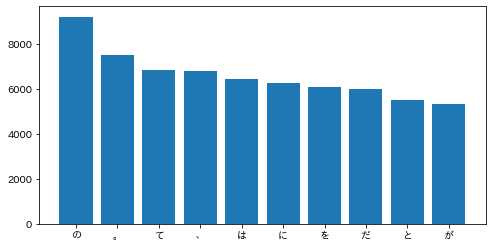

In [11]:
import matplotlib.pyplot as plt
import japanize_matplotlib

ans = {}
for sentence in result:
  for i in range(len(sentence)):
    ans[sentence[i]['base']] = ans.get(sentence[i]['base'], 0) + 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
***
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

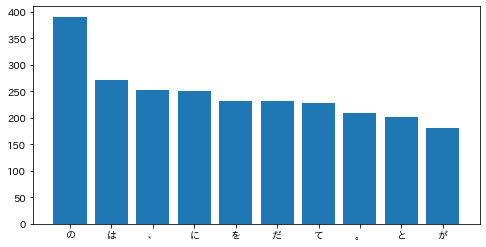

In [12]:
ans = {}
for sentence in result:
  sentence_base = [s['base'] for s in sentence]
  if '猫' in sentence_base:  # 「猫」が含まれる文章中の単語のみを集計
    for i in range(len(sentence_base)):
      ans[sentence_base[i]] = ans.get(sentence_base[i], 0) + 1
del ans['猫']
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

## 38. ヒストグラム
***
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

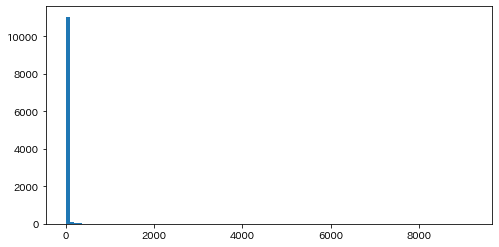

In [13]:
ans = {}
for sentence in result:
  for i in range(len(sentence)):
    ans[sentence[i]['base']] = ans.get(sentence[i]['base'], 0) + 1
ans = ans.values()

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100)
plt.show()

## 39. Zipfの法則
***
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

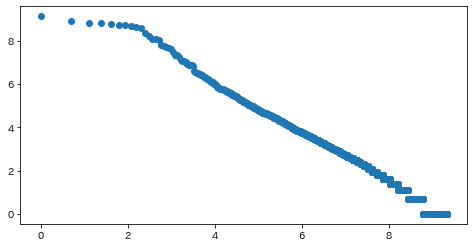

In [14]:
import math

ans = {}
for sentence in result:
  for i in range(len(sentence)):
    ans[sentence[i]['base']] = ans.get(sentence[i]['base'], 0) + 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [math.log(r + 1) for r in range(len(ans))]
values = [math.log(a[1]) for a in ans]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.show()